<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

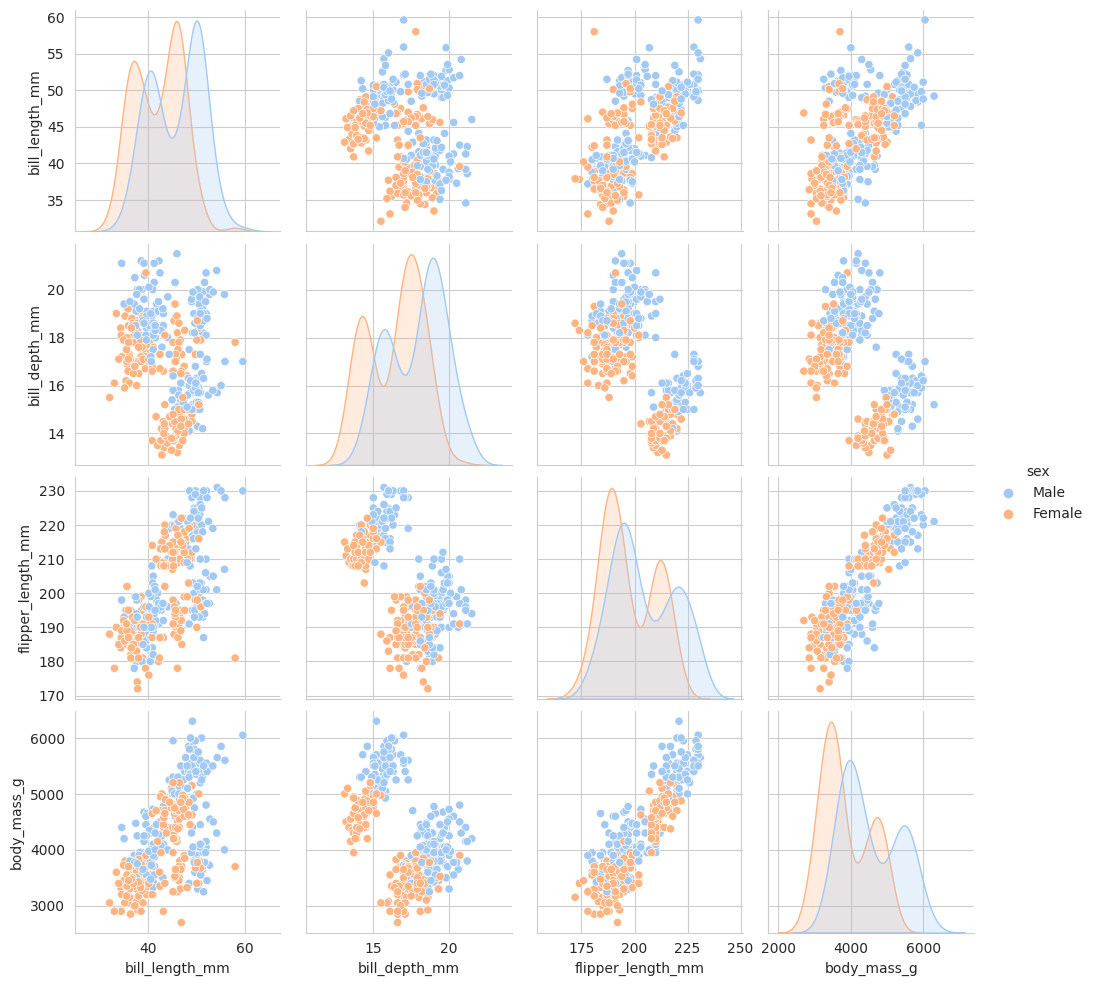

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Os machos tendem a serem maiores e mais pesados

 - Atributos por espécie:

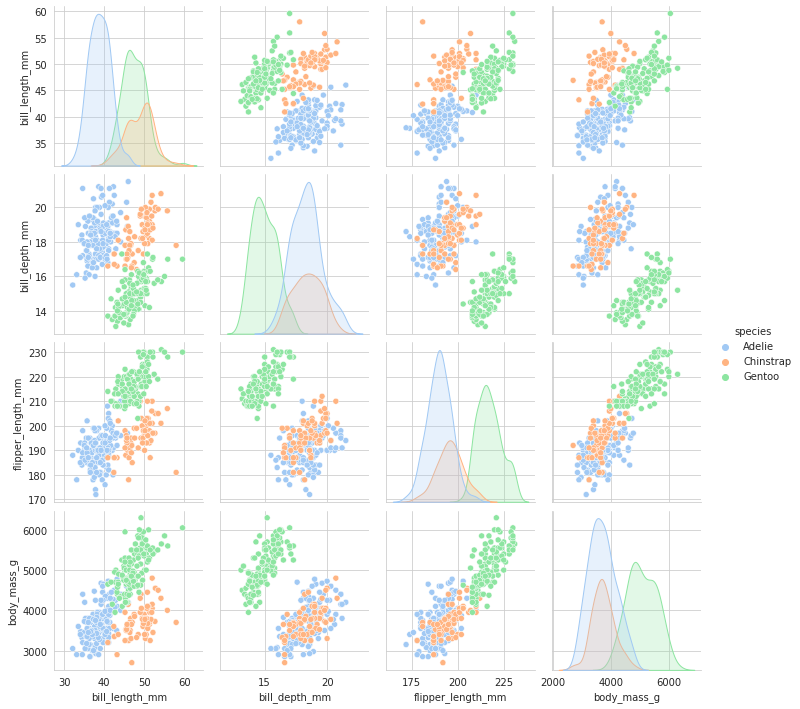

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** A espécie Gentoo possui dimesões e peso diferentes das demais espécies.

 - Atributos por ilha:

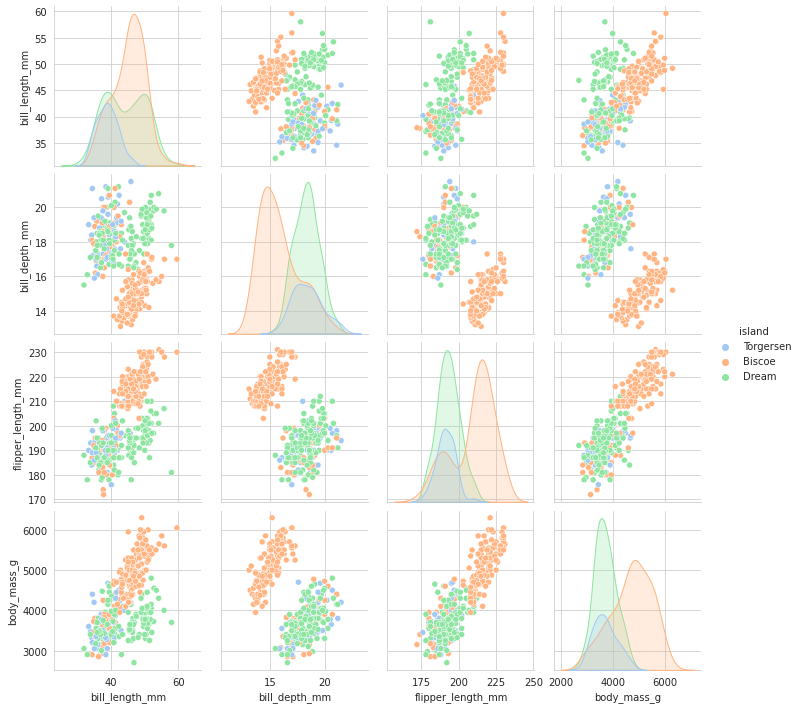

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** A espécie que habita na ilha Biscoe possui dimensões e pesos diferentes das demais.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [5]:
# resposta da questão 2.1
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
data_clean = penguim.dropna()

In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [12]:
media = data_clean['bill_length_mm'].mean()
desvio_padrao = data_clean['bill_length_mm'].std()
data_clean['bill_length_mm_std'] = data_clean['bill_length_mm'].apply(lambda nota: (nota - media) / desvio_padrao)

<ipython-input-12-862a11ce11e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['bill_length_mm_std'] = data_clean['bill_length_mm'].apply(lambda nota: (nota - media) / desvio_padrao)


In [11]:
# resposta da questão 2.2
media = data_clean['bill_depth_mm'].mean()
desvio_padrao = data_clean['bill_depth_mm'].std()
data_clean['bill_depth_mm_std'] = data_clean['bill_depth_mm'].apply(lambda nota: (nota - media) / desvio_padrao)

<ipython-input-11-f0f1e0927380>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['bill_depth_mm_std'] = data_clean['bill_depth_mm'].apply(lambda nota: (nota - media) / desvio_padrao)


In [13]:
media = data_clean['flipper_length_mm'].mean()
desvio_padrao = data_clean['flipper_length_mm'].std()
data_clean['flipper_length_mm_std'] = data_clean['flipper_length_mm'].apply(lambda nota: (nota - media) / desvio_padrao)

<ipython-input-13-bd6e5205219a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['flipper_length_mm_std'] = data_clean['flipper_length_mm'].apply(lambda nota: (nota - media) / desvio_padrao)


In [14]:
media = data_clean['body_mass_g'].mean()
desvio_padrao = data_clean['body_mass_g'].std()
data_clean['body_mass_g_std'] = data_clean['body_mass_g'].apply(lambda nota: (nota - media) / desvio_padrao)

<ipython-input-14-b69bcc8c68ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['body_mass_g_std'] = data_clean['body_mass_g'].apply(lambda nota: (nota - media) / desvio_padrao)


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [16]:
# resposta da questão 2.3
data_clean['species_adelie_nom'] = data_clean['species'].apply(lambda sex: 1 if sex == 'Adelie' else 0)
data_clean['species_chinstrap_nom'] = data_clean['species'].apply(lambda sex: 1 if sex == 'Chinstrap' else 0)
data_clean['species_gentoo_nom'] = data_clean['species'].apply(lambda sex: 1 if sex == 'Gentoo' else 0)

<ipython-input-16-9fdf2b627c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['species_adelie_nom'] = data_clean['species'].apply(lambda sex: 1 if sex == 'Adelie' else 0)
<ipython-input-16-9fdf2b627c79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['species_chinstrap_nom'] = data_clean['species'].apply(lambda sex: 1 if sex == 'Chinstrap' else 0)
<ipython-input-16-9fdf2b627c79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [17]:
data_clean['island_torgersen_nom'] = data_clean['island'].apply(lambda sex: 1 if sex == 'Torgersen' else 0)
data_clean['island_biscoe_nom'] = data_clean['island'].apply(lambda sex: 1 if sex == 'Biscoe' else 0)
data_clean['island_dream_nom'] = data_clean['island'].apply(lambda sex: 1 if sex == 'Dream' else 0)

<ipython-input-17-c1dbf34de840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['island_torgersen_nom'] = data_clean['island'].apply(lambda sex: 1 if sex == 'Torgersen' else 0)
<ipython-input-17-c1dbf34de840>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['island_biscoe_nom'] = data_clean['island'].apply(lambda sex: 1 if sex == 'Biscoe' else 0)
<ipython-input-17-c1dbf34de840>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [18]:
data_clean['sex_m_nom'] = data_clean['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
data_clean['sex_f_nom'] = data_clean['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

<ipython-input-18-b75336c6e4bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sex_m_nom'] = data_clean['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
<ipython-input-18-b75336c6e4bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sex_f_nom'] = data_clean['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [21]:
# resposta da questão 2.4
df = data_clean[['species_adelie_nom',
                  'species_chinstrap_nom',
                  'species_gentoo_nom',
                  'island_torgersen_nom',
                  'island_biscoe_nom',
                  'island_dream_nom',
                  'bill_length_mm_std',
                  'bill_depth_mm_std',
                  'flipper_length_mm_std',
                  'body_mass_g',
                  'sex_m_nom',
                  'sex_f_nom']]

df

,species_adelie_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g,sex_m_nom,sex_f_nom
0,1,0,0,1,0,0,-0.894695,0.779559,-1.424608,3750.0,1,0
1,1,0,0,1,0,0,-0.821552,0.119404,-1.067867,3800.0,0,1
2,1,0,0,1,0,0,-0.675264,0.424091,-0.425733,3250.0,0,1
4,1,0,0,1,0,0,-1.333559,1.084246,-0.568429,3450.0,0,1
5,1,0,0,1,0,0,-0.858123,1.744400,-0.782474,3650.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,0,1,0,1,0,0.586470,-1.759497,0.929884,4925.0,0,1
340,0,0,1,0,1,0,0.513326,-1.454811,1.001232,4850.0,0,1
341,0,0,1,0,1,0,1.171621,-0.743875,1.500670,5750.0,1,0
342,0,0,1,0,1,0,0.220750,-1.200905,0.787187,5200.0,0,1


### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [22]:
# resposta da questão 2.5
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split( df.drop(['body_mass_g'], axis = 1),
                                                                                df['body_mass_g'],
                                                                                test_size = 0.33,
                                                                                random_state = 123)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [23]:
# resposta da questão 3.1
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(predictors_train, target_train)


In [24]:
a = model.coef_
print(a)

[-225.77619674 -538.34481195  764.12100869  -56.8413219    22.02748221
   34.81383969  132.90998703  156.11051727  213.79329032  185.05460499
 -185.05460499]


In [25]:
b = model.intercept_
print(b)

4115.073304511306


### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [26]:
# resposta da questão 3.2
from sklearn.metrics import mean_squared_error

target_predicted = model.predict(predictors_test)
target_predicted[0:5]


array([4231.9436047 , 3209.42821614, 4759.47722881, 4718.80772847,
       4127.5356665 ])

In [27]:
target_test[0:5]

111    4600.0
158    3250.0
288    4700.0
308    4875.0
185    4100.0
Name: body_mass_g, dtype: float64

In [28]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

295.86466872750435


In [29]:
rmse / df['body_mass_g'].mean()

0.07032580369482062

## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [31]:
# resposta da questão 4.1

media = data_clean['bill_length_mm'].mean()
desvio_padrao = data_clean['bill_length_mm'].std()
bill_length_mm_std = (38.2 - media)/desvio_padrao

media = data_clean['bill_depth_mm'].mean()
desvio_padrao = data_clean['bill_depth_mm'].std()
bill_depth_mm_std = (38.2 - media)/desvio_padrao

media = data_clean['flipper_length_mm'].mean()
desvio_padrao = data_clean['flipper_length_mm'].std()
flipper_length_mm_std = (38.2 - media)/desvio_padrao

In [32]:
novo_penguim = np.array([1, 0, 0, 0, 1, 0,
                         bill_length_mm_std,
                         bill_depth_mm_std,
                         flipper_length_mm_std, 1, 0])
novo_penguim

array([  1.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,  -1.05926936,  10.6818791 ,
       -11.61313447,   1.        ,   0.        ])

In [33]:
predicao_novo_penguim = model.predict(novo_penguim.reshape(1,-1))
print(predicao_novo_penguim)

[3140.33516115]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---